In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # To ignore FutureWarning on old functions
import matplotlib as mpl

In [2]:
df = pd.read_csv(r'understat.com.csv', sep =",")
data = df.to_numpy()

In [3]:
print(df)

    Unnamed: 0  Unnamed: 1  position                   team  matches  wins  \
0      La_liga        2014         1              Barcelona       38    30   
1      La_liga        2014         2            Real Madrid       38    30   
2      La_liga        2014         3        Atletico Madrid       38    23   
3      La_liga        2014         4               Valencia       38    22   
4      La_liga        2014         5                Sevilla       38    23   
..         ...         ...       ...                    ...      ...   ...   
679       RFPL        2019        12              PFC Sochi       30     8   
680       RFPL        2019        13              FK Akhmat       30     7   
681       RFPL        2019        14  Krylya Sovetov Samara       30     8   
682       RFPL        2019        15              FC Tambov       30     9   
683       RFPL        2019        16            FC Orenburg       30     7   

     draws  loses  scored  missed  ...        xGA   xGA_diff   

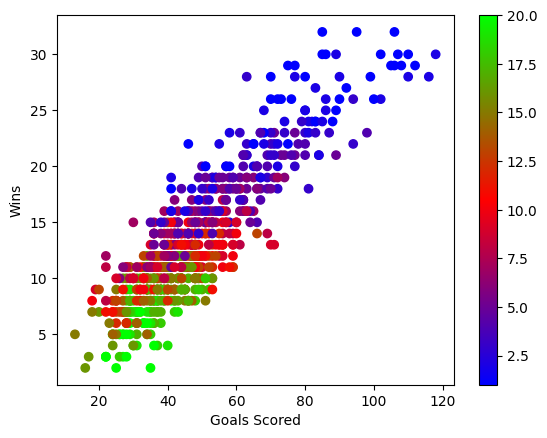

In [4]:
plt.scatter(data[:,8],data[:,5], c=data[:,2], cmap='brg')
plt.xlabel("Goals Scored")
plt.ylabel("Wins")
plt.colorbar()
plt.show()

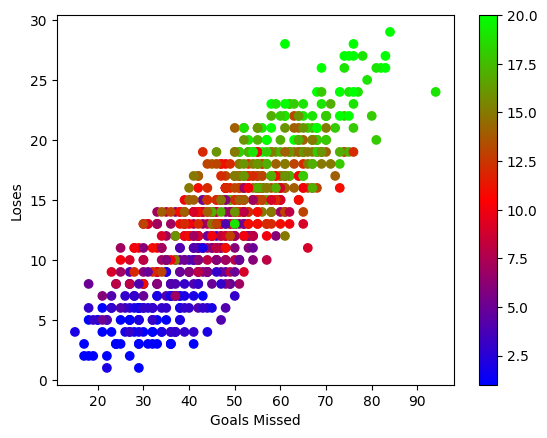

In [5]:
plt.scatter(data[:,9],data[:,7], c=data[:,2],cmap='brg')
plt.xlabel("Goals Missed")
plt.ylabel("Loses")
plt.colorbar()
plt.show()

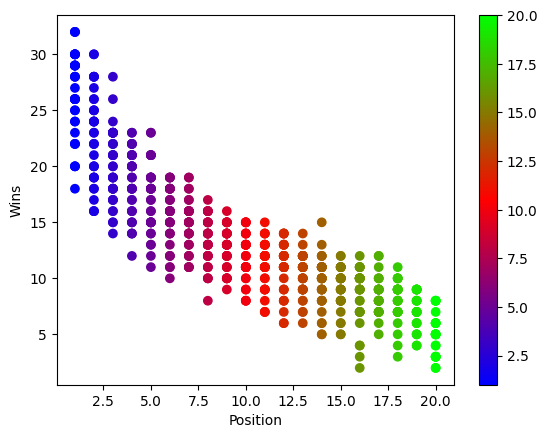

In [6]:
plt.scatter(data[:,2],data[:,5], c=data[:,2], cmap='brg')
plt.xlabel("Position")
plt.ylabel("Wins")
plt.colorbar()
plt.show()

In [7]:
target = data[:,2] # The target is the position atribute
atributes = data[:,5:10] # Wins, draws, loses, goals, missed shots

# Y is target, X is atributes
X_train, X_test, Y_train, Y_test = train_test_split(atributes, target, random_state=0, train_size=0.7)
Y_train=Y_train.astype('int') # To avoid type conflicts

It is important to note that because there are more than 2 atributes (there are 5), we cannot view all the data in a 2D plot as we did in class. Instead, we can plot two atributes, color code its target and include the other atributes in the math but not in the visual demonstration

Naive Bayes

In [8]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

Making predictions on test set

In [9]:
nb_predicted_data = nb.predict(X_test)
nb_error = sum(abs(nb_predicted_data - Y_test)) / len(Y_test)
print("Naive-Bayes error is", nb_error)

Naive-Bayes error is 1.2281553398058251


K-Nearest Neighbors

In [10]:
n = 3 #neighbor number
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

Making predictions on test set

In [11]:
knn_predicted_data = knn.predict(X_test)

In [12]:
knn_error = sum(abs(knn_predicted_data - Y_test))/ len(Y_test)
print("KNN error is", knn_error)

KNN error is 1.674757281553398


RandomForest 

In [13]:
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split = 10, random_state=1)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=10, random_state=1)

Making predictions on test set

In [14]:
rf_pred = rf_clf.predict(X_test)
rf_clf_error = sum(abs(rf_pred - Y_test))/ len(Y_test)
print("RandomForest error is", rf_clf_error)

RandomForest error is 1.233009708737864


Support Vector Machine

In [15]:
svc_clf = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svc_clf.fit(X_train, Y_train)


SVC(C=1, kernel='linear')

Making predictions on test set

In [16]:
svc_clf_pred = svc_clf.predict(X_test)

svc_clf_error = sum(abs(svc_clf_pred - Y_test))/ len(Y_test)
print("Support Vector Machine error is", svc_clf_error)

Support Vector Machine error is 0.9223300970873787


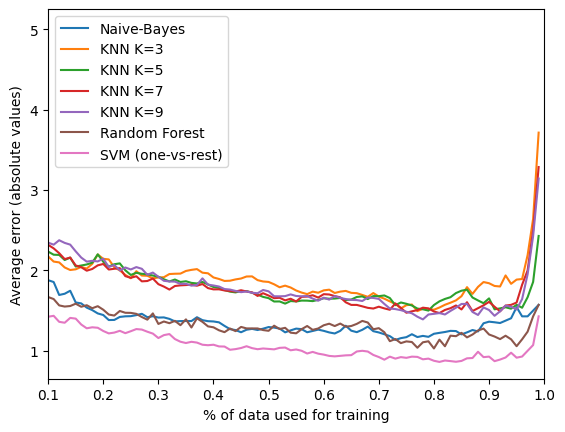

In [17]:
ratio = np.arange(2, 100)
nb_arr = np.zeros(len(ratio))
knn_arr_3 = np.zeros(len(ratio))
knn_arr_5 = np.zeros(len(ratio))
knn_arr_7 = np.zeros(len(ratio))
knn_arr_9 = np.zeros(len(ratio))
rf_arr = np.zeros(len(ratio))
svm_arr = np.zeros(len(ratio))

for i in ratio:
    X_train, X_test, Y_train, Y_test = train_test_split(atributes, target, random_state=0, train_size=(i/100))
    Y_train = Y_train.astype('int')  # To avoid type conflicts

    # Create and train NaiveBayes
    nb = GaussianNB()
    nb.fit(X_train, Y_train)

    # Create and train KNN's
    knn_3 = KNeighborsClassifier(n_neighbors=3)
    knn_5 = KNeighborsClassifier(n_neighbors=5)
    knn_7 = KNeighborsClassifier(n_neighbors=7)
    knn_9 = KNeighborsClassifier(n_neighbors=9)
    knn_3.fit(X_train, Y_train)
    knn_5.fit(X_train, Y_train)
    knn_7.fit(X_train, Y_train)
    knn_9.fit(X_train, Y_train)

    # Create and train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train, Y_train)

    # Create and train SVM (one-vs-rest)
    svm = SVC(kernel='linear', C=1, decision_function_shape='ovr')
    svm.fit(X_train, Y_train)

    # Predict Target
    nb_predicted_data = nb.predict(X_test)
    knn_predicted_data_3 = knn_3.predict(X_test)
    knn_predicted_data_5 = knn_5.predict(X_test)
    knn_predicted_data_7 = knn_7.predict(X_test)
    knn_predicted_data_9 = knn_9.predict(X_test)
    rf_predicted_data = rf.predict(X_test)
    svm_predicted_data = svm.predict(X_test)

    # Calculate Average Errors
    knn_error_3 = sum(abs(knn_predicted_data_3 - Y_test)) / len(Y_test)
    knn_error_5 = sum(abs(knn_predicted_data_5 - Y_test)) / len(Y_test)
    knn_error_7 = sum(abs(knn_predicted_data_7 - Y_test)) / len(Y_test)
    knn_error_9 = sum(abs(knn_predicted_data_9 - Y_test)) / len(Y_test)
    nb_error = sum(abs(nb_predicted_data - Y_test)) / len(Y_test)
    rf_error = sum(abs(rf_predicted_data - Y_test)) / len(Y_test)
    svm_error = sum(abs(svm_predicted_data - Y_test)) / len(Y_test)

    # Save error into array
    nb_arr[i-2] = nb_error
    knn_arr_3[i-2] = knn_error_3
    knn_arr_5[i-2] = knn_error_5
    knn_arr_7[i-2] = knn_error_7
    knn_arr_9[i-2] = knn_error_9
    rf_arr[i-2] = rf_error
    svm_arr[i-2] = svm_error

# Error plotting
plt.plot((ratio/100), abs(nb_arr), label='Naive-Bayes')
plt.plot((ratio/100), abs(knn_arr_3), label="KNN K=3")
plt.plot((ratio/100), abs(knn_arr_5), label="KNN K=5")
plt.plot((ratio/100), abs(knn_arr_7), label="KNN K=7")
plt.plot((ratio/100), abs(knn_arr_9), label="KNN K=9")
plt.plot((ratio/100), abs(rf_arr), label="Random Forest")
plt.plot((ratio/100), abs(svm_arr), label="SVM (one-vs-rest)")

# Plot parameters
plt.xlim(0.1, 1)
plt.xlabel("% of data used for training")
plt.ylabel("Average error (absolute values)")
plt.legend()
plt.show()